In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD XAU/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

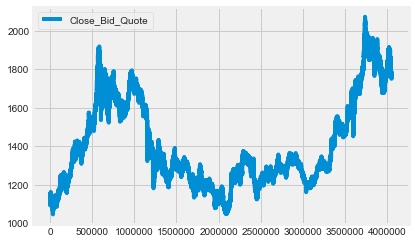

In [3]:
plt.figure(figsize=(20,5))
data.plot()

In [4]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 18:01:00         1099.550
1        2010-01-03 18:02:00         1099.200
2        2010-01-03 18:03:00         1099.700
3        2010-01-03 18:04:00         1099.950
4        2010-01-03 18:05:00         1100.050
...                      ...              ...
4052841  2021-06-30 23:54:00         1775.368
4052842  2021-06-30 23:55:00         1775.638
4052843  2021-06-30 23:56:00         1775.655
4052844  2021-06-30 23:57:00         1775.715
4052845  2021-06-30 23:58:00         1775.655

[4052846 rows x 2 columns]>

In [5]:
data['Timestamp'].min()

'2010-01-03 18:01:00'

In [6]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [7]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [8]:
data = data.resample("H").max()

In [9]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

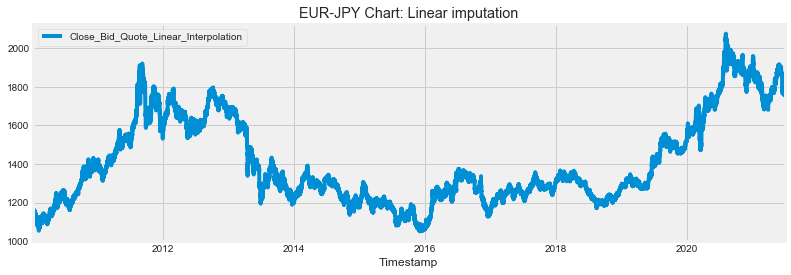

In [10]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-XAU Chart: Linear imputation')
plt.show(block=False)

In [11]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [12]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [13]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03 18:00:00,1100.05
2010-01-03 19:00:00,1096.40
2010-01-03 20:00:00,1095.63
2010-01-03 21:00:00,1098.88
2010-01-03 22:00:00,1099.08


In [14]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [15]:
len(test)

20142

In [16]:
len(train)

80568

In [17]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

80568

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04835239],
       [0.04478845],
       [0.0440366 ],
       ...,
       [0.70430739],
       [0.70737335],
       [0.70820624]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [20]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04835239, 0.04478845, 0.0440366 , 0.04720997, 0.04740526,
       0.0502857 , 0.05172104, 0.05175033, 0.05179915, 0.05873175,
       0.06170983, 0.06258861, 0.06636736, 0.06480509, 0.06602561,
       0.07127876, 0.07103466, 0.07061479, 0.06712897, 0.06592797,
       0.06664076, 0.06812492, 0.06898417, 0.06903299, 0.0704488 ,
       0.07041951, 0.06983366, 0.06961884, 0.0713764 , 0.07144475,
       0.07159122, 0.07494034, 0.07542855, 0.07528209, 0.07479388,
       0.07442284, 0.07039998, 0.07535044, 0.07408109, 0.06973601,
       0.07337807, 0.07367099, 0.07183532, 0.06895488, 0.06592797,
       0.06778317, 0.06727543, 0.06585962, 0.06678722, 0.06747072,
       0.06958955, 0.07144475, 0.07210872, 0.07227471, 0.07168886,
       0.07188414, 0.07176697, 0.0732316 , 0.07420802, 0.07406156])]
[0.07334877381003535]

[array([0.04835239, 0.04478845, 0.0440366 , 0.04720997, 0.04740526,
       0.0502857 , 0.05172104, 0.05175033, 0.05179915, 0.05873175,
       0.06170983, 0.06258861, 0.06

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
2516/2516 [==============================] - 261s 102ms/step - loss: 6.7960e-04
Epoch 2/10
2516/2516 [==============================] - 250s 99ms/step - loss: 2.4303e-05
Epoch 3/10
2516/2516 [==============================] - 251s 100ms/step - loss: 1.5883e-05
Epoch 4/10
2516/2516 [==============================] - 261s 104ms/step - loss: 1.1420e-05
Epoch 5/10
2516/2516 [==============================] - 250s 99ms/step - loss: 9.4120e-06
Epoch 6/10
2516/2516 [==============================] - 260s 104ms/step - loss: 9.4071e-06
Epoch 7/10
2516/2516 [==============================] - 262s 104ms/step - loss: 7.6358e-06
Epoch 8/10
2516/2516 [==============================] - 254s 101ms/step - loss: 7.2039e-06
Epoch 9/10
2516/2516 [==============================] - 259s 103ms/step - loss: 7.0483e-06
Epoch 10/10
2516/2516 [==============================] - 254s 101ms/step - loss: 6.9318e-06


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.6252987522951248

In [25]:
rms = np.sqrt(mean_squared_error(y_test, predictions))
rms

2.6252987522951248

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


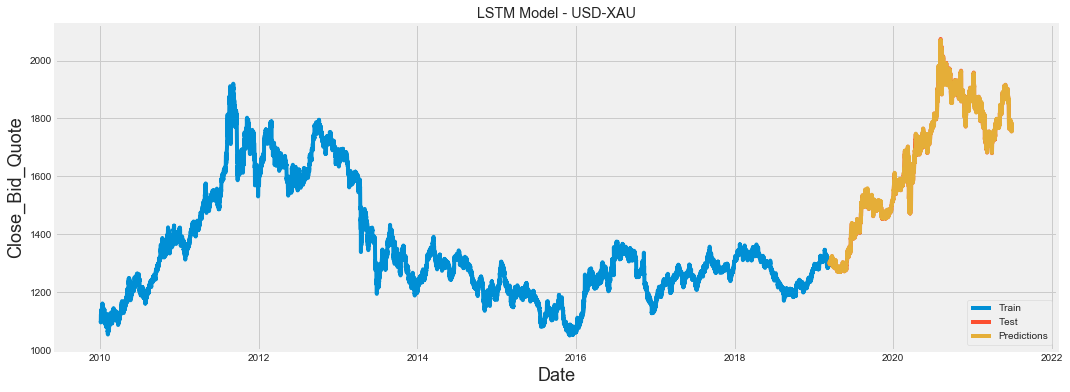

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-XAU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-14 18:00:00,1296.308,1297.208374
2019-03-14 19:00:00,1296.555,1296.805054
2019-03-14 20:00:00,1296.255,1297.119507
2019-03-14 21:00:00,1298.815,1296.742554
2019-03-14 22:00:00,1299.765,1299.591187
...,...,...
2021-06-30 19:00:00,1770.028,1770.293823
2021-06-30 20:00:00,1768.328,1770.420044
2021-06-30 21:00:00,1771.845,1768.361450
